In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(4446966, 29)
(1934174, 28)


In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## Match Types

In [43]:
print('Match Players :' ,train["matchId"].nunique())

Match Players : 47964


In [7]:
mat_type = train["matchType"].value_counts().to_frame().reset_index()
mat_type.columns = ["Type","Count"]
mat_type

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


기본적으로 솔로(1명), 듀오(2명), 스쿼드(4명) 모드 이렇게 3가지로 구성되어있다.
 * FPP - 1인칭 모드
 * TPP - 3인칭 모드

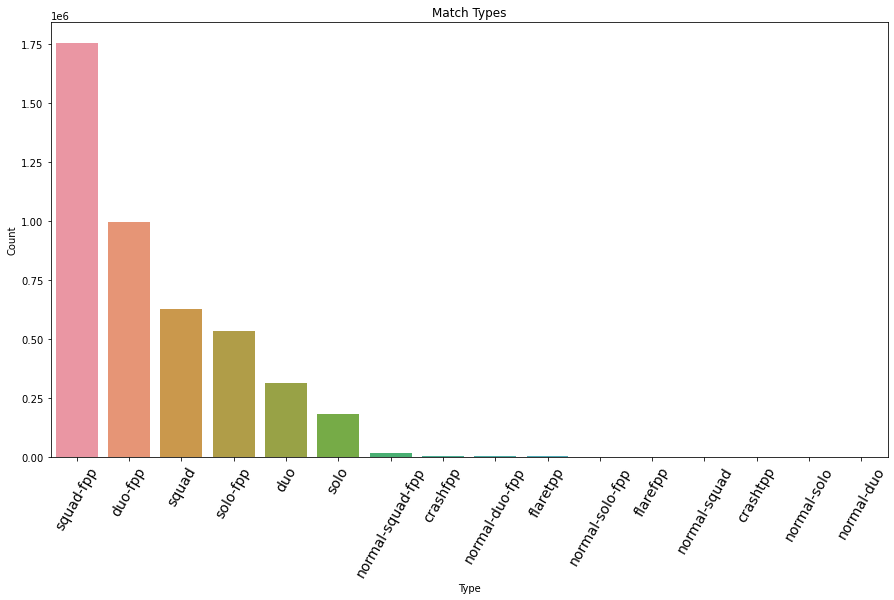

In [8]:
plt.figure(figsize=(15,8))
ticks = mat_type.Type.values
ax = sns.barplot(x="Type", y="Count", data=mat_type)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match Types")
plt.show()

In [9]:
mat_type2 = train["matchType"].value_counts().to_frame()
squads_sum = mat_type2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
duos_sum = mat_type2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
solo_sum = mat_type2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregate = pd.DataFrame([squads_sum,duos_sum,solo_sum], index=["squad","duo","solo"], columns =["count"])
aggregate

,count
squad,2400402
duo,1315970
solo,720713


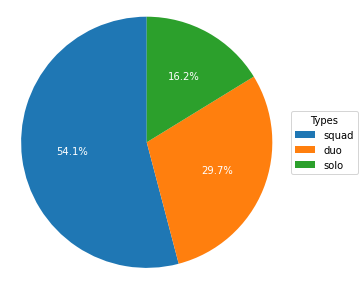

In [14]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregate["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

솔로, 듀오, 스쿼드의 종류가 여러 가지이지만 **스쿼드 > 듀오 > 솔로** 순서로 인기가 많은것을 알 수 있다.

그 중 스쿼드가 54%로 압도적으로 많이 플레이 하는것을 알 수 있다.

## Kill and Damage

Kill 카운트를 해보자!

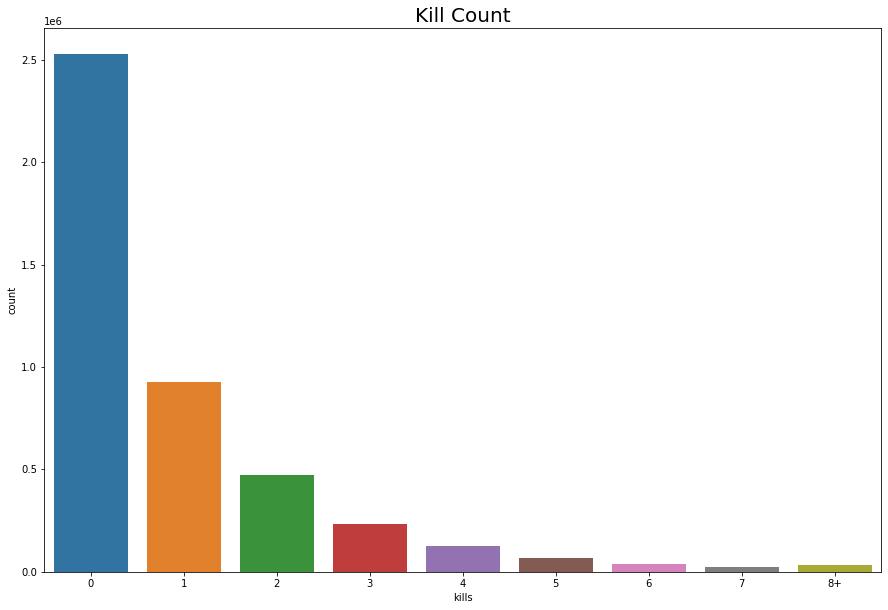

In [20]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=20)
plt.show()

0킬 한 사람의 대미지를 알아보자!

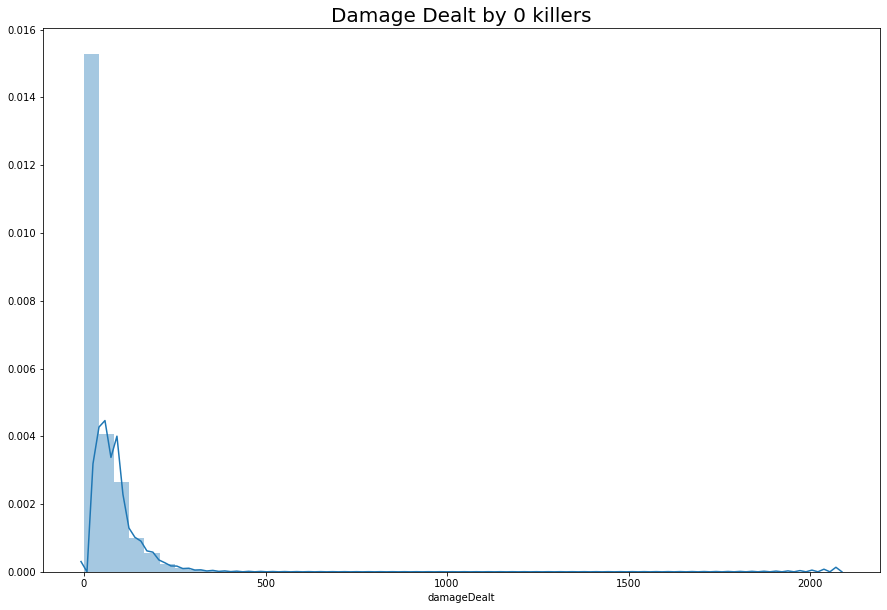

In [22]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=20)
sns.distplot(data['damageDealt'])
plt.show()

킬과 치킨(승리)의 관계

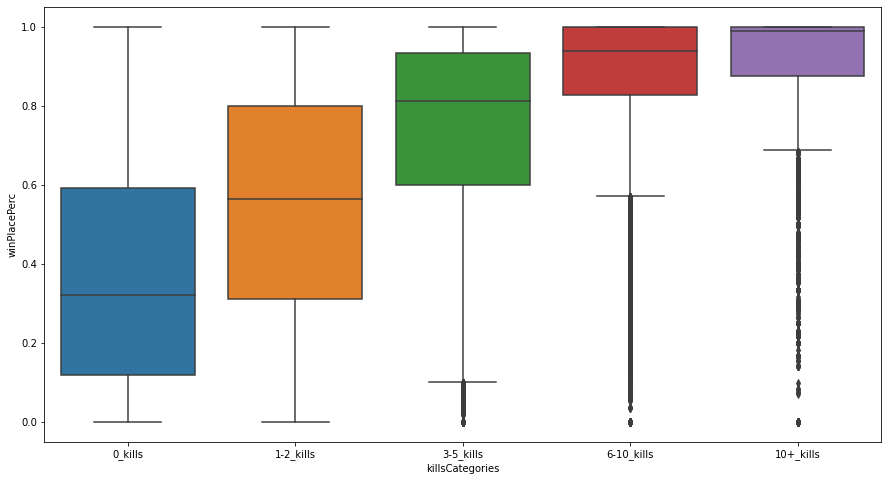

In [23]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

### 변수가 여러가지 있지만 킬을 많이하면 많이 할수록 치킨(승리) 먹을 가능성이 높아보이는 것을 알 수 있다.

In [31]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

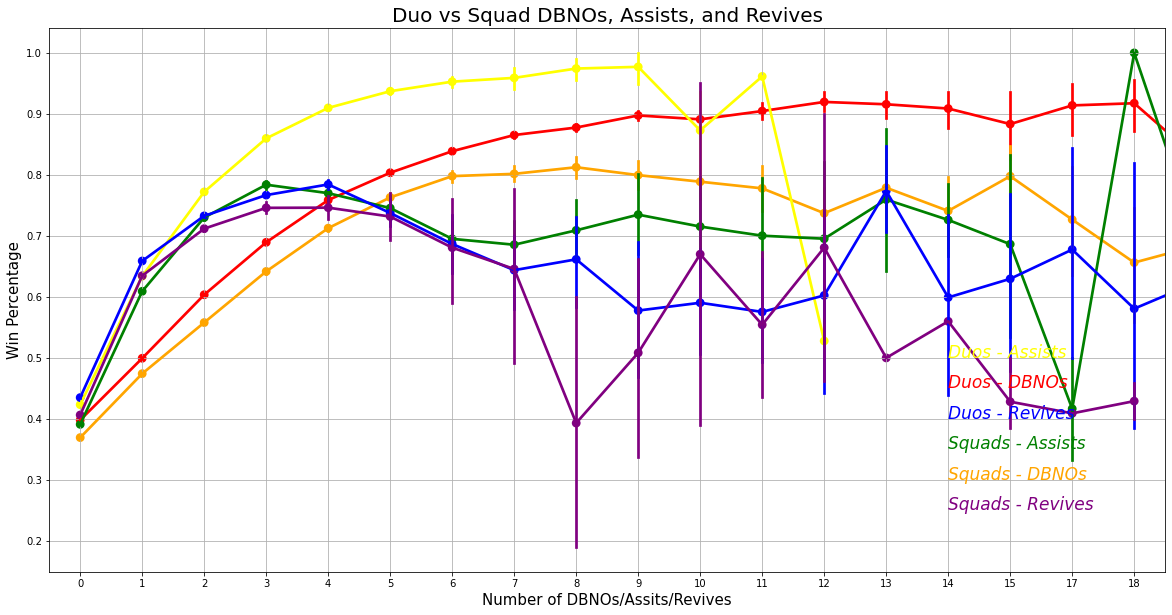

In [32]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='orange',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='yellow',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='green',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='blue',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='purple',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='yellow',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='red',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='blue',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='green',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='orange',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='purple',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20)
plt.grid()
plt.show()

## Heal and Boost

In [44]:
print("평균적으로 {:.1f} heal 아이템을 사용하였다. 95%의 사람들은 {}개 이하를 사용, 최대 {}개 사용하였다.".format(train['heals'].mean(), train['heals'].quantile(0.95), train['heals'].max()))
print("평균적으로 {:.1f} boost 아이템을 사용하였다. 95%의 사람들은 {}개 이하를 사용, 최대 {}개 사용하였다.".format(train['boosts'].mean(), train['boosts'].quantile(0.95), train['boosts'].max()))

평균적으로 1.4 heal 아이템을 사용하였다. 95%의 사람들은 7.0개 이하를 사용, 최대 80개 사용하였다.
평균적으로 1.1 boost 아이템을 사용하였다. 95%의 사람들은 5.0개 이하를 사용, 최대 33개 사용하였다.


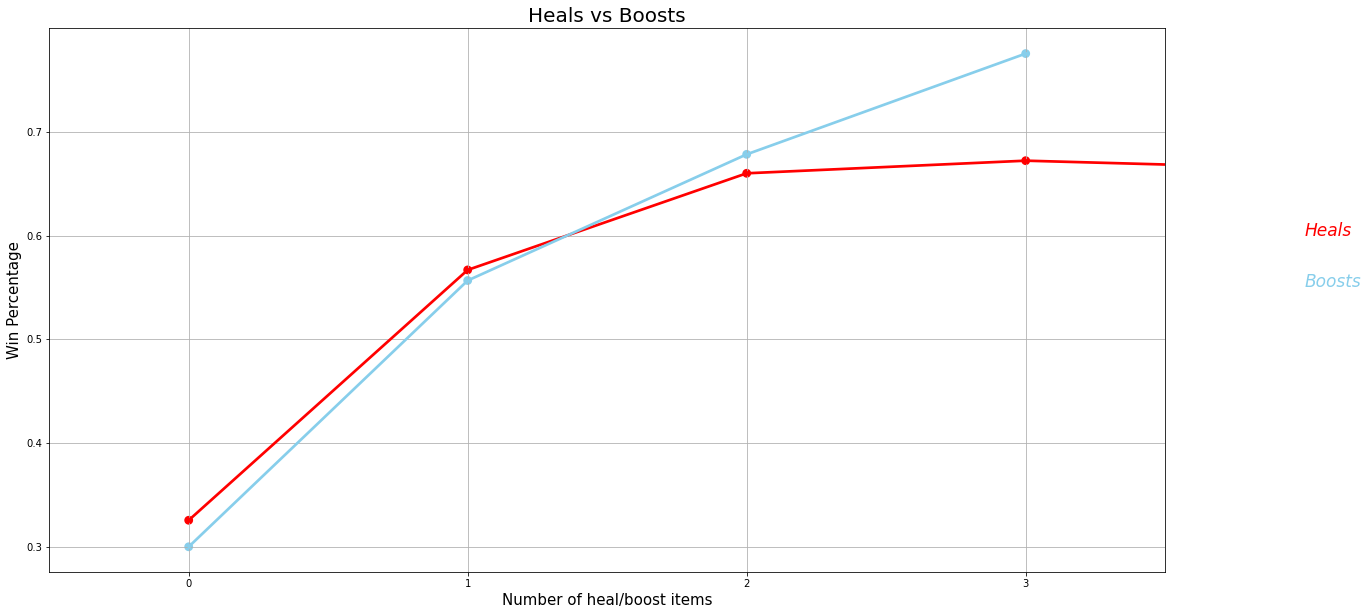

In [29]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.95)]
data = data[data['boosts'] < data['boosts'].quantile(0.95)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='skyblue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='skyblue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Heals vs Boosts',fontsize = 20)
plt.grid()
plt.show()

Heal 아이템과 Boost 아이템을 많이 사용하면 할수록 이기는 경우가 많음을 알 수 있다. 특히 오래 살아남기에는 부스트 아이템을 많이 사용함을 알 수 있고 이 또한 실제 게임 플레이에서도 그러하다.

## Use XGBoost

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [36]:
# 전처리
train.dropna(subset=["winPlacePerc"], inplace=True)

X = train.drop(["Id","groupId","matchId","matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]

col_names = X.columns

transformer = Normalizer().fit(X)
X = transformer.transform(X)

In [37]:
X = pd.DataFrame(X, columns=col_names)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [39]:
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 

steps = 20  # The number of training iterations
model = xgb.train(param, D_train, steps)

[17:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


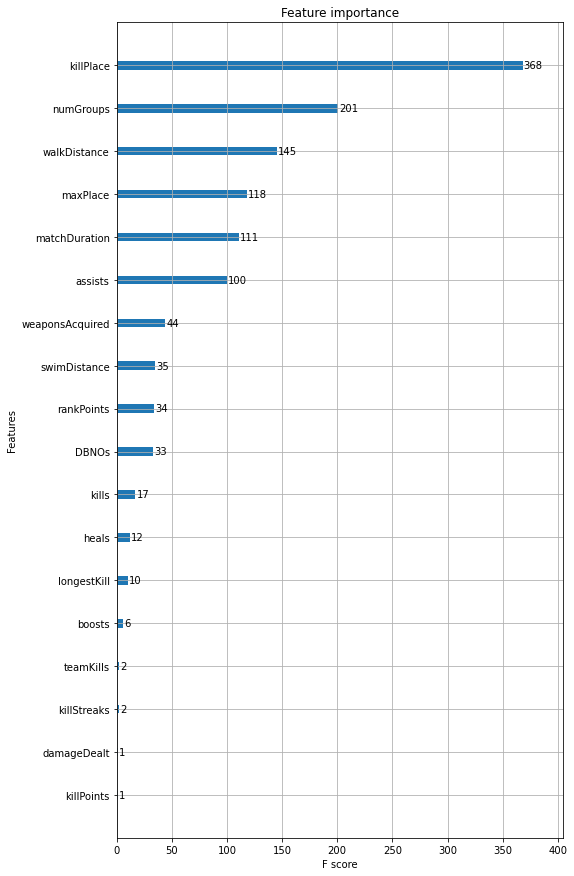

In [40]:
fig, ax1 = plt.subplots(figsize=(8,15))
xgb.plot_importance(model, ax=ax1)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("MSE = {}".format(mean_squared_error(Y_test, best_preds)))

MSE = 0.3179655147005542
